## Student Alcohol Consumption

With the data set provided, there were ample amount of things that could have been done. For example, one could predict if a student is in relationship, quantity of alcohol consumption and also his marks in the subject. Marks would be inconsistent to predict as subjects are different, but still I'll take it as a challenge and work with it in this notebook. I'll be working on predicting average grade and not the final grade of the student.

Before moving ahead, let's import all required packages in one go. 

In [60]:
import pandas as pd # To read csv, handle dataframe operations.
import numpy as np # To create arrays
import matplotlib.pyplot as plt # For creating beautiful plots.
from tqdm import tqdm # Just a little tweak to get a progress bar with slow processing cells.
from sklearn.model_selection import train_test_split as tts # Splitting data set to test and train.
from sklearn.tree import DecisionTreeRegressor # Making a decision tree regression model
from sklearn.ensemble import RandomForestRegressor # Making a Random Forest regression model
from sklearn.svm import SVR # Building a Support Vector Regression model
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score

%matplotlib inline
tqdm.pandas() # Magic initializer for the package

Reading csv files and creating dataframes.

In [61]:
math_class_data = pd.read_csv('student-mat.csv')
port_class_data = pd.read_csv('student-por.csv')

Check the data types of columns of both these dataframes.

In [62]:
math_class_data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [63]:
port_class_data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

As we are guessing the marks of the student, we need to make a target column. And as previously mentioned, we are guessing overall grade. Therefore let's drop G1, G2, G3 and instead add a column with the average of these 3.

In [64]:
def create_target_column(df):
    '''This method creates a column with the average marks in G1, G2, and G3. Also deletes the 3 columns
    with marks. In the end, we are left with only 1 column with average marks.
    @param df The dataframe on which work needs to be done.
    @return modified dataframe with removed columns and a new column with average marks.'''
    G1 = np.asarray(df["G1"].tolist(), dtype = int)
    G2 = np.asarray(df["G2"].tolist(), dtype = int)
    G3 = np.asarray(df["G3"].tolist(), dtype = int)
    df.drop(["G1", "G2", "G3"], axis = 1, inplace = True)
    G1 = np.divide((G1 + G2 + G3), 3)
    df["G"] = list(G1)
    return df

Applying the above function to both the dataframes.

In [65]:
math_class_data = create_target_column(math_class_data)
port_class_data = create_target_column(port_class_data)

Let's see how it worked out.

In [66]:
math_class_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.679325
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.696786
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.333333
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.333333
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,10.666667
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.333333
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.333333


In [67]:
port_class_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.625064
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.833360
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.333333
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.666667
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.333333
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,18.666667


It is time to merge these dataframes. As told that there are 382 repeated but I have ignored it just to see that model doesn't overfit later by memorising data.

For merging, first a copy of one of the dataframe is made and then they are merged together.

In [68]:
student_data = math_class_data.copy(deep = True)

In [69]:
student_data = student_data.merge(port_class_data, how = 'outer')

Let's see how the data looks now.

In [70]:
student_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G
count,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000,1042.000000
mean,16.729367,2.600768,2.386756,1.523992,1.968330,0.264875,3.935701,3.200576,3.157390,1.493282,2.284069,3.542226,4.443378,11.269034
std,1.238853,1.124318,1.099794,0.732070,0.832779,0.656669,0.933264,1.032181,1.153114,0.911266,1.284623,1.425257,6.212933,3.221602
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.333333
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.333333
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.333333
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.333333
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.333333


1042 students. There should have been 1044 actually, but 2 students had same average in both the subjects and thus were included only once each.

Let us find out all the columns that contain atleast 1 missing value.

In [71]:
nan_list = student_data.columns[student_data.isna().any()].tolist()
print(nan_list)

[]


None! No missing data to handle here. 

But we do have categorical data. It needs to be handled to work with ML algorithms. The approach is to just encode data to integer. No hard steps taken to convert the word to vectors using embedding or anything.

In [72]:
def clean_categorical_data(df):
    '''First, we create a list of columns that contain categorical data. Then we traverse the list
    and apply cat.codes method to convert it to integer data.'''
    object_list = list(df.select_dtypes(include = ['object']).columns)
    for column in tqdm(object_list):
        df[column] = df[column].astype('category').cat.codes
    return df

In [73]:
student_data = clean_categorical_data(student_data)

100%|████████████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 1244.51it/s]


Feature scaling isn't necessary here as range was mentioned for each column and was almost the same for all columns.

Now, it is time to select features and target. target would be required to be brought to a correct datatype to work correctly. Previous experience tells me that without converting it a numpy array and then squeezing causes issues during building models.

In [74]:
features = student_data.iloc[:, :-1].values
features.dtype

dtype('int64')

In [75]:
target = student_data.iloc[:, -1:].values
target = np.squeeze(np.asarray(target))

In [76]:
target.dtype

dtype('float64')

Split the data to train and test. Testing is done on 20% of data.

In [77]:
x_train, x_test, y_train, y_test = tts(features, target, test_size = 0.2, random_state = 42)

It is time to define functions that calculate metrics for the models used.

In [78]:
def get_variance_score(true, predict):
    '''
    Returns variance score.
    '''
    variance = explained_variance_score(true, predict)
    return variance


def get_mae(true, predict):
    '''
    Finds and returns mean absolute error.
    '''
    mae = mean_absolute_error(true, predict)
    return mae


def get_mse(true, predict):
    '''
    finds and returns mean squared error
    '''
    mse = mean_squared_error(true, predict)
    return mse


def get_msle(true, predict):
    '''
    finds and returns mean squared log error.
    '''
    msle = mean_squared_log_error(true, predict)
    return msle


def get_mdae(true, predict):
    '''
    finds and returns median absolute error.
    '''
    mdae = median_absolute_error(true, predict)
    return mdae


def get_r2(true, predict):
    '''
    Calculates R2 score and returns it.
    '''
    r2 = r2_score(true, predict)
    return r2

We should see how a specific machine learning model builds a regression model. Basically, how does the 'line' look like with respect to which it would predict the test data. For this we take a trained regressor and use it to predict on the same data as it was built on and then compare the actual values with the predicted values.

In [93]:
def model_graph(regressor, x_train, y_train, title):
    '''
    A trained regressor is asked to predict the values of the data with which it was trained. This way, we get how does the model sees the data.
    Dots represent the actual data points we have and line represents the model our regressor has built.
    '''
    false_train = regressor.predict(x_train)
    plt.scatter(np.arange(1,len(y_train)+1).tolist(), y_train, color = 'orange')
    plt.plot(np.arange(1,len(y_train)+1).tolist(), false_train, color = 'red')
    plt.title(title)
    plt.xlabel("Entry")
    plt.ylabel("Values")
    plt.show()

Now to keep tasks simple at hand, let's make functions of the models we are going to build.

In [94]:
def simple_dtr(X_train, X_test, y_train, y_test):
    '''
    A Decision Tree Regression Model that takes 4 inputs which are quite intutive by the names. Returns all the metrics and the predicted values as
    well.
    '''
    regressor = DecisionTreeRegressor()
    regressor.fit(X_train, y_train)
    model_graph(regressor, X_train, y_train, "Decision Tree")
    y_predict = regressor.predict(X_test)
    variance = get_variance_score(y_test, y_predict)
    mae = get_mae(y_test, y_predict)
    mse = get_mse(y_test, y_predict)
    msle = get_msle(y_test, y_predict)
    r2 = get_r2(y_test, y_predict)
    mdae = get_mdae(y_test, y_predict)
    return variance, mae, mse, msle, r2, mdae, y_predict


def simple_rfr(X_train, X_test, y_train, y_test, criteria):
    '''
    A Random Forest Regression Model with 100 trees and a specified criterion. With warm_start set as true, it tells that it is free to use the model
    it previously build during the same session and modify it. By this manner, a Random Forest model would keep on improving by some factor whenever it 
    is rebuild.
    '''
    regressor = RandomForestRegressor(n_estimators = 100, criterion = criteria, warm_start = True)
    regressor.fit(X_train, y_train)
    model_graph(regressor, X_train, y_train, "Random Forest "+criteria)
    y_predict = regressor.predict(X_test)
    variance = get_variance_score(y_test, y_predict)
    mae = get_mae(y_test, y_predict)
    mse = get_mse(y_test, y_predict)
    msle = get_msle(y_test, y_predict)
    r2 = get_r2(y_test, y_predict)
    mdae = get_mdae(y_test, y_predict)
    return variance, mae, mse, msle, r2, mdae, y_predict


def simple_svr(X_train, X_test, y_train, y_test, kernel):
    '''
    A Support Vector Regression model built using specified kernel, returns various metrics along with the prediction values.
    '''
    regressor = SVR(kernel = kernel)
    regressor.fit(X_train, y_train)
    model_graph(regressor, X_train, y_train, "SVR "+kernel)
    y_predict = regressor.predict(X_test)
    variance = get_variance_score(y_test, y_predict)
    mae = get_mae(y_test, y_predict)
    mse = get_mse(y_test, y_predict)
    msle = get_msle(y_test, y_predict)
    r2 = get_r2(y_test, y_predict)
    mdae = get_mdae(y_test, y_predict)
    return variance, mae, mse, msle, r2, mdae, y_predict

To compare various models we need to keep track of their outputs as well as metrics. Lets store these values in differnt lists.

In [95]:
variance = []
absolute_error = []
squared_error = []
squared_log_error = []
r2 = []
median_error = []

Working with Decision Tree first. Adding outputs to specific lists as well.

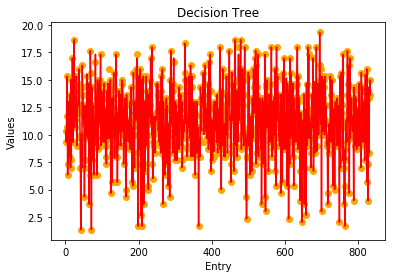

Variance Score: -0.2803711956779582
Mean Absolute Error: 2.738437001594896
Mean Square Error: 13.180489101541731
Mean Square Log Error: 0.13311322832516737
R2 Score: -0.2803714427760382
Median Absolute Error: 2.333333333333332


In [96]:
algo = "Decision Tree"
v, a, s, sl, r, m, y = simple_dtr(x_train, x_test, y_train, y_test)
print("Variance Score: {}\nMean Absolute Error: {}\nMean Square Error: {}\nMean Square Log Error: {}\nR2 Score: {}\nMedian Absolute Error: {}".format(v, a, s, sl, r, m))

variance.append(v)
absolute_error.append(a)
squared_error.append(s)
squared_log_error.append(sl)
r2.append(r)
median_error.append(m)

It is trying to capture all the values. Quite strange behaviour from Decision Tree which I haven't seen previously. Red flag, maybe?

Nevertheless, moving on to build Random Forest with both the possible criterions to see if there is any difference between the models they build.

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

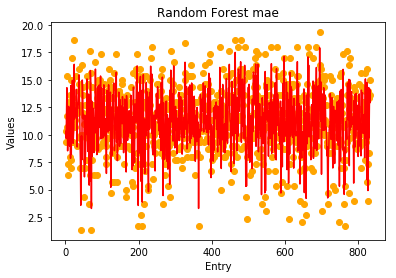

mae
Variance Score: 0.2629451891486383
Mean Absolute Error: 2.1092663476874
Mean Square Error: 7.594388197767145
Mean Square Log Error: 0.07013278550654996
R2 Score: 0.2622703377040041
Median Absolute Error: 1.6883333333333361


 50%|██████████████████████████████████████████                                          | 1/2 [00:04<00:04,  4.09s/it]

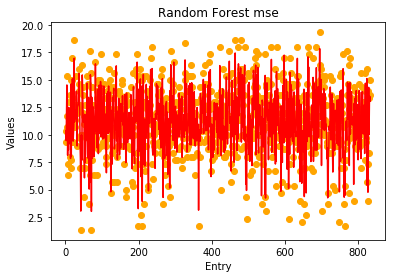

mse
Variance Score: 0.24064900753432938
Mean Absolute Error: 2.102092086276297
Mean Square Error: 7.828765789645772
Mean Square Log Error: 0.07184542515517545
R2 Score: 0.23950256534319625
Median Absolute Error: 1.6350000000000016


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:04<00:00,  3.01s/it]


In [97]:
criterions = ["mae", "mse"]
for c in tqdm(criterions):
    algo = "Random Forest"
    algo += " - "
    algo += c
    v, a, s, sl, r, m, y = simple_rfr(x_train, x_test, y_train, y_test, c)
    print(c)
    print("Variance Score: {}\nMean Absolute Error: {}\nMean Square Error: {}\nMean Square Log Error: {}\nR2 Score: {}\nMedian Absolute Error: {}".format(v, a, s, sl, r, m))
    
    variance.append(v)
    absolute_error.append(a)
    squared_error.append(s)
    squared_log_error.append(sl)
    r2.append(r)
    median_error.append(m)

Models look quite same to me. Also, it has improved over Decision Tree as well by not overfitting over the train data.

Next is the time for Support Vectors. I have used three kernels with which I am building three different models. 

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]C:\Users\japke\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


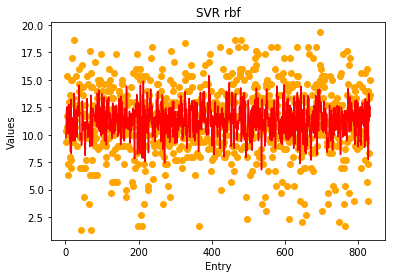

rbf
Variance Score: 0.13177674534861716
Mean Absolute Error: 2.2324343407042906
Mean Square Error: 8.941313551372913
Mean Square Log Error: 0.08209017118291728
R2 Score: 0.13142809467175431
Median Absolute Error: 1.7635845477696428


 33%|████████████████████████████                                                        | 1/3 [00:00<00:00,  5.14it/s]C:\Users\japke\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


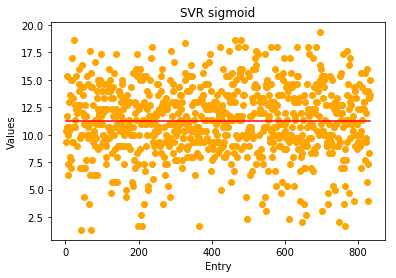

sigmoid
Variance Score: 6.2513161314115e-10
Mean Absolute Error: 2.572408292629507
Mean Square Error: 10.33706006878946
Mean Square Log Error: 0.09086981915279531
R2 Score: -0.004156705595272259
Median Absolute Error: 2.099999999890601


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:00<00:00,  5.03it/s]

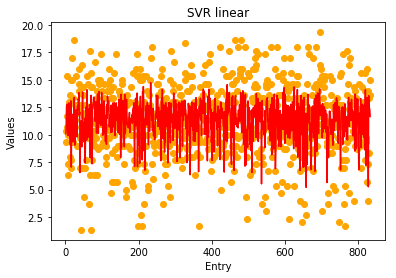

linear
Variance Score: 0.11783281428602921
Mean Absolute Error: 2.250920646445594
Mean Square Error: 9.083094898235316
Mean Square Log Error: 0.08481755124589538
R2 Score: 0.11765525314497727
Median Absolute Error: 1.740660326948957


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  4.57it/s]


In [98]:
kernels = ["rbf", "sigmoid", "linear"]
for k in tqdm(kernels):
    algo = "SVR - "
    algo += k
    v, a, s, sl, r, m, y = simple_svr(x_train, x_test, y_train, y_test, k)
    print(k)
    print("Variance Score: {}\nMean Absolute Error: {}\nMean Square Error: {}\nMean Square Log Error: {}\nR2 Score: {}\nMedian Absolute Error: {}".format(v, a, s, sl, r, m))
    
    variance.append(v)
    absolute_error.append(a)
    squared_error.append(s)
    squared_log_error.append(sl)
    r2.append(r)
    median_error.append(m)

Wow! All the models built, except the SVR with Sigmoid kernel, seems to be trying to reach to all the values. Especially the decision tree. From the graphs that have come, it can be said that SVR with linear kernel or rbf kernel is actually going to work better as it is not overfit on the data.

Time to visualize the metrics. For it, plotting all of those on the same graph to get a clear view.

In [99]:
def draw_graph(*lists):
    '''
    This method takes variable number of lists as input. But as I know how many metrics I have used, I have initialized colors and labels to the
    same number.
    It plots all those list's data on the graph and returns nothing.
    '''
    colors = ['blue', 'red', 'green', 'yellow', 'orange', 'violet']
    labels = ['Variance Score', 'Mean Absolute Error', 'Mean Square Error', 'Mean Square Log Error', 'R2 Score', 'Median Absolute Error']
    i = 0
    for args in tqdm(lists):
        plt.plot(np.arange(1,7).tolist(), args, color = colors[i], label = labels[i])
        i += 1
    plt.xlabel('Algorithms')
    plt.xticks(np.arange(1,7).tolist(), ('Decision Tree', 'Random Forest - MAE', 'Random Forest - MSE', 'SVR - rbf', 'SVR - Sigmoid', 'SVR - linear'))
    plt.ylabel('Errors')
    plt.title('Algorithms vs Errors')
    plt.legend()
    plt.show()

100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 462.79it/s]


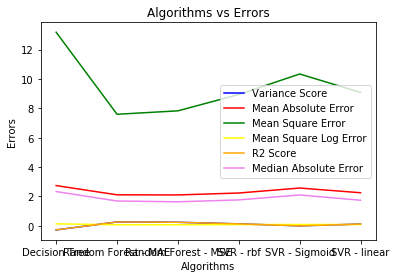

In [100]:
draw_graph(variance, absolute_error, squared_error, squared_log_error, r2, median_error)

This graph compared all the algorithms for various metrics recommended by sklearn in their documentation for a regression based machine learning model. From this graph it is surely difficult to choose the right model amongst the ones we have used as some or the other parameter is better for different model.

## What can be done to get these models to do better?

Some of the features are not required and are probably the reason the models are trying to reach to all values. So we can remove those features. To find out those features, one can use P-values for it and build a model with backward elimination. This would slow down the model building time significantly but would increase accuracy.

Backward Elimination --> First a model with all features is build, then P-values for each feature is calculated, then the feature with highest P value is removed. The process is repeated from building a model, again finding P-values, removal and goes on till P-values of all the remaining features is brought down to predefined threshold. (on average, the threshold is chosen as 0.05)

P-values --> It can be vaguely said as the contribution of each feature in degrading the model.

I haven't added the Backward elimination code in this notebook but it can be found in one of my previous project here: https://github.com/Japkeerat/House-Price-Predictions